# Se puede arrancar el TP dsd este notebook que tiene el csv con una limpieza inicial

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip install flashtext

In [74]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.graph_objects as go
sns.set(style="whitegrid")
from wordcloud import WordCloud

In [75]:
entrenamiento = pd.read_csv('https://raw.githubusercontent.com/miguelAfonzalida/TP1-OrgaDatos/master/dataTP1.csv?token=AG4D7WHBUYUK6LERNUKZXFC7XECB2')
entrenamiento.head()

ID   Region   Territory  ...       Prod_Category_A        Hemisferio  Estación
0  27761   Europa        None  ...  Prod_Category_A_None              None       NaN
1  27760   Europa        None  ...  Prod_Category_A_None              None       NaN
2  27446  América  NW America  ...  Prod_Category_A_None  Hemisferio Norte     Otoño
3  16808  América  NW America  ...  Prod_Category_A_None  Hemisferio Norte     Otoño
4  16805  América  NW America  ...  Prod_Category_A_None  Hemisferio Norte     Otoño

[5 rows x 54 columns]

# Miro como esta compuesto el csv

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(entrenamiento)

In [76]:
df = entrenamiento

# Analizo el Stage

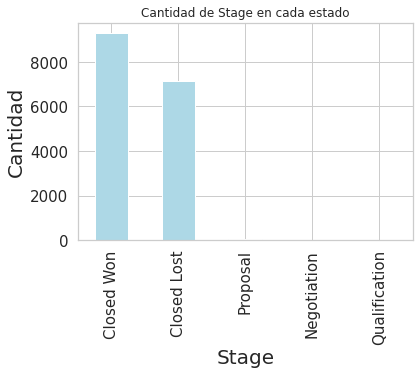

In [13]:
plt.clf()
g = df.Stage.value_counts().plot(kind='bar', color='lightblue', title='Cantidad de Stage en cada estado',fontsize=15)
g.set_ylabel("Cantidad", fontsize=20)
g.set_xlabel("Stage", fontsize=20)
plt.show()

# Busco relaciones entre las regiones y territorios en base a su stage

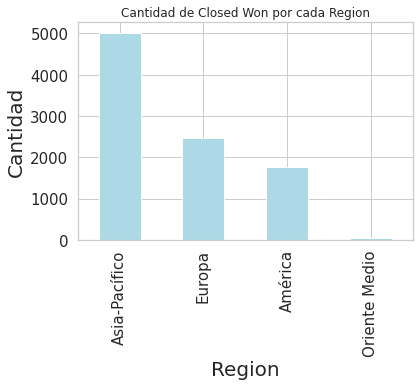

In [ ]:
plt.clf()
g = df.loc[df['Stage'] == 'Closed Won'].Region.value_counts().plot(kind='bar', color='lightblue', title='Cantidad de Closed Won por cada Region',fontsize=15)
g.set_ylabel("Cantidad", fontsize=20)
g.set_xlabel("Region", fontsize=20)
plt.show()

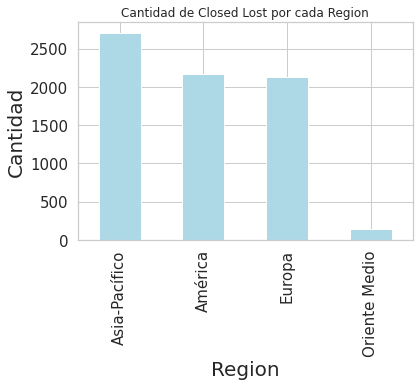

In [ ]:
plt.clf()
g = df.loc[df['Stage'] == 'Closed Lost'].Region.value_counts().plot(kind='bar', color='lightblue', title='Cantidad de Closed Lost por cada Region',fontsize=15)
g.set_ylabel("Cantidad", fontsize=20)
g.set_xlabel("Region", fontsize=20)
plt.show()

In [30]:
df['closed_won'] = df['Stage'] == 'Closed Won'
df['closed_lost'] = df['Stage'] == 'Closed Lost'

df['cant_closed_won_by_territory']=df.loc[:,['Territory','closed_won']].groupby('Territory').transform('sum')
df['cant_closed_lost_by_territory']=df.loc[:,['Territory','closed_lost']].groupby('Territory').transform('sum')
df['cant_total'] = df['cant_closed_won_by_territory'] + df['cant_closed_lost_by_territory']
df.head()

ID   Region  ... cant_closed_lost_by_territory  cant_total
0  27761   Europa  ...                           530         787
1  27760   Europa  ...                           530         787
2  27446  América  ...                           587        1535
3  16808  América  ...                           587        1535
4  16805  América  ...                           587        1535

[5 rows x 60 columns]

In [36]:
top10_territorios = df.sort_values(by=['cant_total'], ascending=False).head(10)

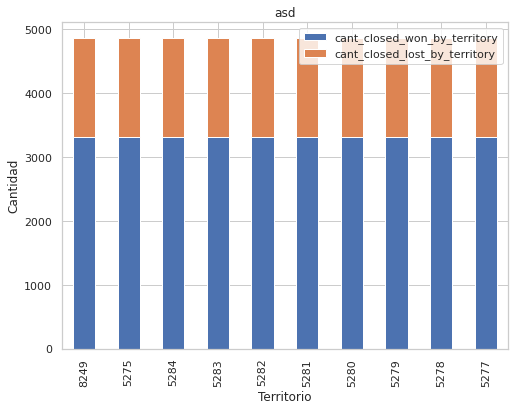

In [26]:
# Grafico Vertical
fig, axes = plt.subplots(nrows=1, ncols=1)
ax = top10_territorios[['cant_closed_won_by_territory','cant_closed_lost_by_territory']]\
.plot.bar(ax=axes , stacked=True  , rot=90, figsize=(15,10), title="asd")

fig.set_size_inches(8, 6)


ax.set_xlabel("Territorio")
ax.set_ylabel("Cantidad");

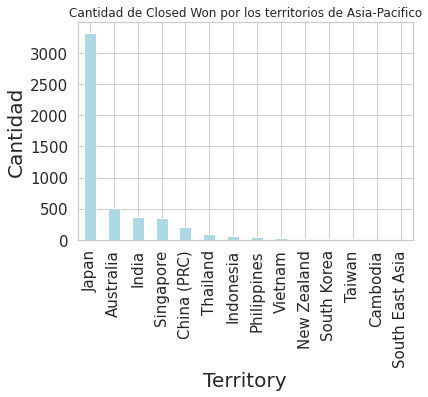

In [ ]:
plt.clf()
g = df.loc[(df['Stage'] == 'Closed Won') & (df['Region'] == 'Asia-Pacífico')].Territory.value_counts().plot(kind='bar', color='lightblue', title='Cantidad de Closed Won por los territorios de Asia-Pacifico',fontsize=15)
g.set_ylabel("Cantidad", fontsize=20)
g.set_xlabel("Territory", fontsize=20)
plt.show()

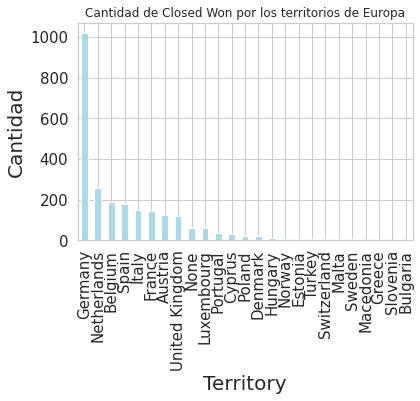

In [ ]:
plt.clf()
g = df.loc[(df['Stage'] == 'Closed Won') & (df['Region'] == 'Europa')].Territory.value_counts().plot(kind='bar', color='lightblue', title='Cantidad de Closed Won por los territorios de Europa',fontsize=15)
g.set_ylabel("Cantidad", fontsize=20)
g.set_xlabel("Territory", fontsize=20)
plt.show()

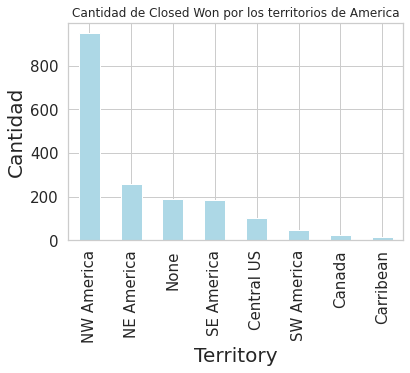

In [ ]:
plt.clf()
g = df.loc[(df['Stage'] == 'Closed Won') & (df['Region'] == 'América')].Territory.value_counts().plot(kind='bar', color='lightblue', title='Cantidad de Closed Won por los territorios de America',fontsize=15)
g.set_ylabel("Cantidad", fontsize=20)
g.set_xlabel("Territory", fontsize=20)
plt.show()

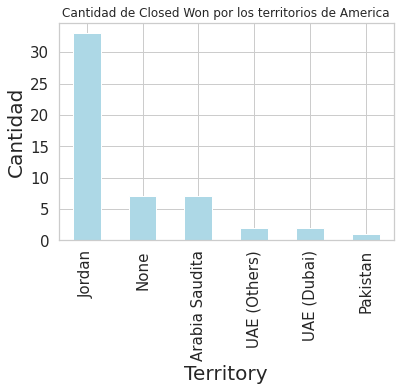

In [ ]:
plt.clf()
g = df.loc[(df['Stage'] == 'Closed Won') & (df['Region'] == 'Oriente Medio')].Territory.value_counts().plot(kind='bar', color='lightblue', title='Cantidad de Closed Won por los territorios de America',fontsize=15)
g.set_ylabel("Cantidad", fontsize=20)
g.set_xlabel("Territory", fontsize=20)
plt.show()

In [ ]:
cantClosedWonByJapan = df[(df['Stage'] == 'Closed Won') & (df['Territory'] == 'Japan')]
cantClosedWonByGermany = df[(df['Stage'] == 'Closed Won') & (df['Territory'] == 'Germany')]
cantClosedWonByNWAmerica = df[(df['Stage'] == 'Closed Won') & (df['Territory'] == 'NW America')]
cantClosedWonByJordan = df[(df['Stage'] == 'Closed Won') & (df['Territory'] == 'Jordan')]

cantClosedLostByJapan = df[(df['Stage'] == 'Closed Lost') & (df['Territory'] == 'Japan')]
cantClosedLostByGermany = df[(df['Stage'] == 'Closed Lost') & (df['Territory'] == 'Germany')]
cantClosedLostByNWAmerica = df[(df['Stage'] == 'Closed Lost') & (df['Territory'] == 'NW America')]
cantClosedLostByJordan = df[(df['Stage'] == 'Closed Lost') & (df['Territory'] == 'Jordan')]

cantTop4TerritoryClosedWon = [len(cantClosedWonByJapan) , len(cantClosedWonByGermany), len(cantClosedWonByNWAmerica), len(cantClosedWonByJordan)]
cantTop4TerritoryClosedLost = [len(cantClosedLostByJapan) , len(cantClosedLostByGermany), len(cantClosedLostByNWAmerica), len(cantClosedLostByJordan)]

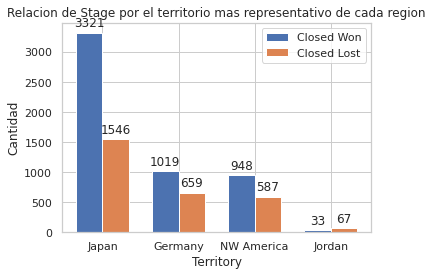

In [ ]:
labels = ['Japan', 'Germany', 'NW America', 'Jordan']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cantTop4TerritoryClosedWon, width, label='Closed Won')
rects2 = ax.bar(x + width/2, cantTop4TerritoryClosedLost, width, label='Closed Lost')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_xlabel('Territory')
ax.set_title('Relacion de Stage por el territorio mas representativo de cada region')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
only_closed_won = df[df['Stage'] == 'Closed Won']
main_closed_won_territory_counts = only_closed_won['Territory'].value_counts()
main_closed_won_territory_counts = main_closed_won_territory_counts[main_closed_won_territory_counts > 200]
main_closed_won_territory_counts

Japan          3321
Germany        1019
NW America      948
Australia       510
India           374
Singapore       355
NE America      258
Netherlands     257
None            257
China (PRC)     202
Name: Territory, dtype: int64

In [ ]:
only_closed_lost = df[df['Stage'] == 'Closed Lost']
main_closed_lost_territory_counts = only_closed_lost['Territory'].value_counts()
main_closed_lost_territory_counts = main_closed_lost_territory_counts[main_closed_lost_territory_counts > 200]
main_closed_lost_territory_counts

Japan          1546
Germany         659
NW America      587
None            530
NE America      501
India           433
Australia       306
France          303
SE America      302
Netherlands     275
Name: Territory, dtype: int64

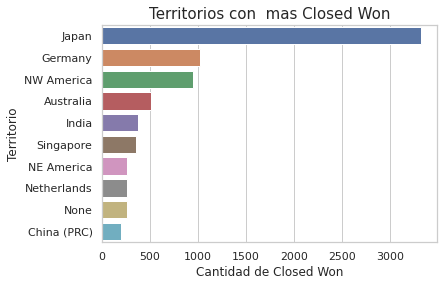

In [ ]:
g = sns.barplot(x=main_closed_won_territory_counts.values, y=main_closed_won_territory_counts.index, orient='h')
g.set_title("Territorios con  mas Closed Won", fontsize=15)
g.set_xlabel("Cantidad de Closed Won", fontsize=12)
g.set_ylabel("Territorio", fontsize=12);

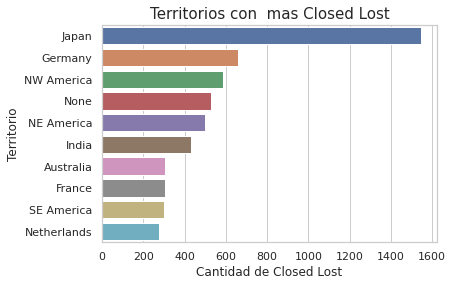

In [ ]:
g = sns.barplot(x=main_closed_lost_territory_counts.values, y=main_closed_lost_territory_counts.index, orient='h')
g.set_title("Territorios con  mas Closed Lost", fontsize=15)
g.set_xlabel("Cantidad de Closed Lost", fontsize=12)
g.set_ylabel("Territorio", fontsize=12);

# Analizo Opportunity

Cada fila del dataframe es un item de una oportunidad. Si agrupan por Opportunity_Name y suman los Total_Amount deberían llegar a Total_Taxable_Amount. Si esto no se cumple en todos, es algo para analizar en el TP.

In [78]:
df['suma_total_amount_opportunity']=df.loc[:,['Opportunity_Name','Total_Amount']].groupby('Opportunity_Name').transform('sum')
df['total_amount_igual_taxable_amount'] = df['suma_total_amount_opportunity'] == df['Total_Taxable_Amount']
df.head(10)

ID  ... total_amount_igual_taxable_amount
0  27761  ...                              True
1  27760  ...                              True
2  27446  ...                              True
3  16808  ...                              True
4  16805  ...                              True
5  16802  ...                              True
6  16799  ...                              True
7  27455  ...                              True
8  24353  ...                              True
9  24355  ...                              True

[10 rows x 56 columns]

In [80]:
df[df['suma_total_amount_opportunity'] == 0]

ID  ... total_amount_igual_taxable_amount
464    28260  ...                              True
579    25679  ...                              True
580    25718  ...                              True
586    15710  ...                              True
1129   17845  ...                              True
...      ...  ...                               ...
15854  13119  ...                              True
15886  19011  ...                              True
15900  28261  ...                              True
16211  19923  ...                              True
16283  19044  ...                              True

[97 rows x 56 columns]

In [64]:
algunos_campos = df[df['total_amount_igual_taxable_amount'] == False].loc[:,['Opportunity_Name','Region','Territory','Total_Amount','suma_total_amount_opportunity','Total_Taxable_Amount']]
algunos_campos

Opportunity_Name  ... Total_Taxable_Amount
70     Opportunity_Name_12137  ...             420750.0
71     Opportunity_Name_12137  ...             420750.0
72     Opportunity_Name_12137  ...             420750.0
132     Opportunity_Name_2683  ...                  0.0
137     Opportunity_Name_5030  ...           13438632.9
...                       ...  ...                  ...
16410   Opportunity_Name_7576  ...            4055000.0
16411   Opportunity_Name_7576  ...            4055000.0
16413   Opportunity_Name_5039  ...                  0.0
16497   Opportunity_Name_5843  ...                  0.0
16498   Opportunity_Name_9911  ...                  0.0

[1606 rows x 6 columns]

In [52]:
algunos_campos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 70 to 16498
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Opportunity_Name               1606 non-null   object 
 1   Region                         1606 non-null   object 
 2   Territory                      1606 non-null   object 
 3   suma_total_amount_opportunity  1606 non-null   float64
 4   Total_Taxable_Amount           1606 non-null   float64
dtypes: float64(2), object(3)
memory usage: 75.3+ KB


Me fijo los registros donde el Total_Taxable_Amount sea 0 esos probablemente estan mal cargados

In [68]:
algunos_campos['total_taxable_amount_0'] = (algunos_campos['Total_Taxable_Amount'] == 0) & (algunos_campos['suma_total_amount_opportunity'] > 0)

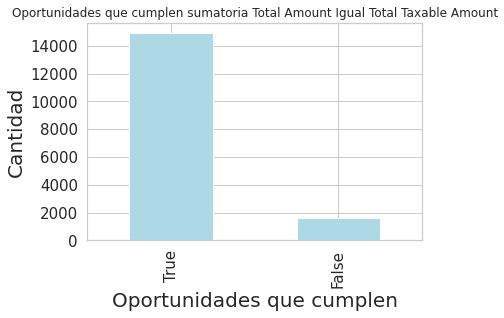

In [69]:
plt.clf()
g = df['total_amount_igual_taxable_amount'].value_counts().plot(kind='bar', color='lightblue', title='Oportunidades que cumplen sumatoria Total Amount Igual Total Taxable Amount',fontsize=15)
g.set_ylabel("Cantidad", fontsize=20)
g.set_xlabel("Oportunidades que cumplen", fontsize=20)
plt.show();

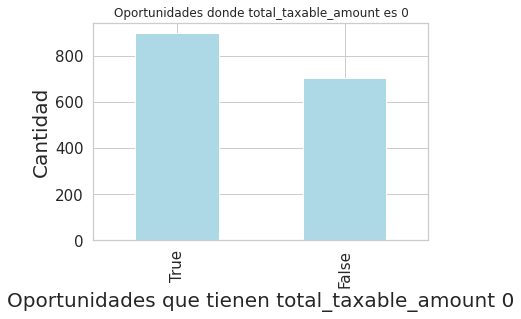

In [71]:
plt.clf()
g = algunos_campos['total_taxable_amount_0'].value_counts().plot(kind='bar', color='lightblue', title='Oportunidades donde total_taxable_amount es 0',fontsize=15)
g.set_ylabel("Cantidad", fontsize=20)
g.set_xlabel("Oportunidades que tienen total_taxable_amount 0", fontsize=20)
plt.show();
